Checking cropped images...
7_Cheering_Cheering_7_74 12


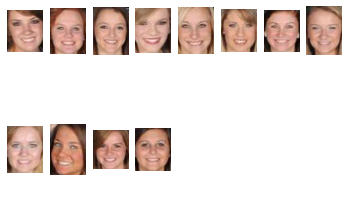

7_Cheering_Cheering_7_543 22


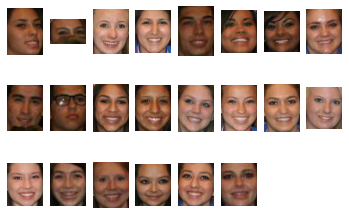

7_Cheering_Cheering_7_889 35


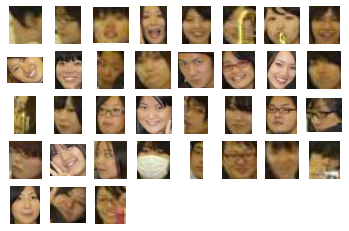

Face Detection using dlib:
7_Cheering_Cheering_7_74.jpg #det 12


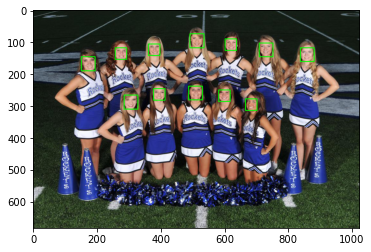

7_Cheering_Cheering_7_543.jpg #det 21


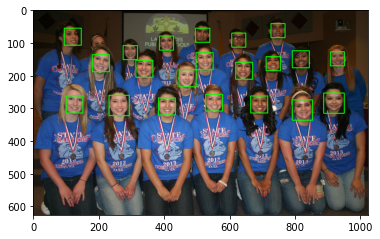

7_Cheering_Cheering_7_889.jpg #det 7


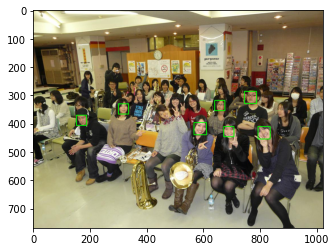

image resize:
7_Cheering_Cheering_7_74.jpg #det 12


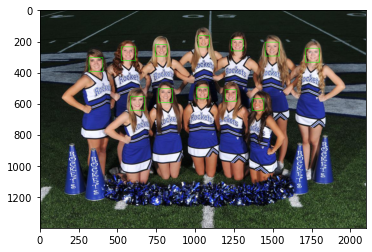

7_Cheering_Cheering_7_543.jpg #det 21


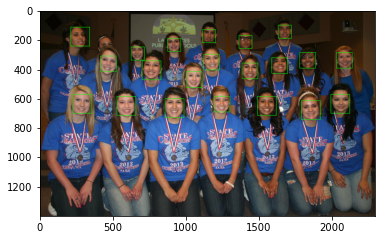

7_Cheering_Cheering_7_889.jpg #det 14


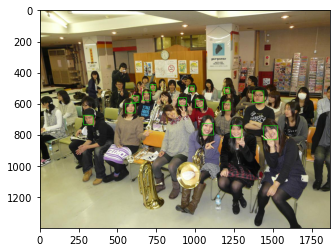

In [18]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline
PATH=os.getcwd()
# print("PATH:",PATH)
pkl_path = PATH+ "\\" + 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
annotate_list = list(dict.keys(annotate_dict))
# print(annotate_list)
data_dir = 'data_dir'
# print(img_name)
img_file=os.path.join(PATH, data_dir)
def draw_bbox():
    # Enter your code here and remove the following pass (20%)
    for img_name in annotate_list:
        image_path = os.path.join(img_file, img_name)
        image = cv2.imread(image_path)
        for bbox in annotate_dict[img_name]:
            # draw bounding boxes on the image
            x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
            cv2.rectangle(image, (x1,y1), (x2,y2), (0,255,0), thickness=2)
        # use plt.imshow() to show the image
        # plt.imshow(image)
        # plt.show()

def save_bbox():
    save_dir = 'save_dir' # Do not change this line
    # Enter your code here (20%)    
    # create a directory named save_dir
    isExists = os.path.exists(save_dir)
    if not isExists:
      os.makedirs(save_dir)
    for img_name in annotate_list:
        image_path = os.path.join(img_file, img_name)
        image = cv2.imread(image_path)
        j=0
        for j,bbox in enumerate(annotate_dict[img_name]):
            x1, y1, x2, y2 = bbox[0],bbox[1],bbox[2],bbox[3]
            image_crop = image[y1:y2, x1:x2]
            # use plt.imshow() to show the image
            save_name = str(j) + ".jpg"
            save_path = os.path.join(PATH, save_dir)
            cv2.imwrite(save_path +"/" + img_name[:-4] + "_" + save_name, image_crop)
            #plt.imshow(image_crop)
            #plt.show()

# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
    detector = dlib.get_frontal_face_detector()
    for img_name in annotate_list:
        img_path = os.path.join(img_file, img_name)
        image = cv2.imread(img_path)
        dets = detector(image, 1)
        #print('dets',dets)
        count=0
        for det in dets:
            x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
            # draw bounding box based on x1, y1, x2, y2
            cv2.rectangle(image,(x1,y1),(x2,y2), (0,255,0), thickness=2)
            # image_crop = image[y1:y2, x1:x2]
            # image_crop = image_crop[:,:,::-1] # convert from BGR to RGB
            count=count+1
        print(img_name, "#det" ,count)
        image_crop = image[:,:,::-1] # convert from BGR to RGB
        # use plt.imshow() to show the image
        # cv2.imwrite(save_path+"/"+save_name, image_crop[:,:,::-1])
        plt.imshow(image_crop)
        plt.show()

    #resize
    print("image resize:")
    for img_name in annotate_list:
        img_path = os.path.join(img_file, img_name)
        image = cv2.imread(img_path)
        
        #print('dets',dets)
        count=0
        height=image.shape[0]
        width =image.shape[1]
        n_height = 1400
        x=n_height*(width/height)
        n_width = int(x)
        n_image = cv2.resize(image, (n_width, n_height), interpolation=cv2.INTER_CUBIC)
        dets = detector(n_image, 1)
        for det in dets:
                x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
                cv2.rectangle(n_image, (x1,y1), (x2,y2), (0,255,0), thickness=2)
                count=count+1
        image_crop = n_image[:,:,::-1] # convert from BGR to RGB
        print(img_name, "#det" ,count)
        plt.imshow(image_crop)
        plt.show()

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  test_dlib()